<a href="https://colab.research.google.com/github/brianfarrelly/final_capstone/blob/master/modeltest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Capstone - Deep Learning - Chest Xrays Comparing Normal Chest Xrays to Viral and Bacterial Pneunomia Chest Xrays.

Brian Farrelly, Thinkful Data Science Immersion Bootcamp

May 21, 2020






---



---



---



---



This Header will be included in all five project files. modeltest.ipynb,
bacterial_pneumonia_xrays.ipynb, bacterial_pneumonia_xrays_robust.ipynb,
viral_penumonia_xrays.ipynb, viral_pneumonia_xrays_robust.ipynb. "Chest Xray" will be replaced the appreviation CXR. Viral Penumonia will be referred to as Viral. And Bacterial Pneumonia will be referred to as Bacterial.




---



---



---



---




1. Wrangle your data. Get it into the notebook in the best form possible for your analysis and model building.

Data pulled from: 
https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

Stored on a mounted google drive with 1300 training files for normal, 1300 viral pneumonia files and 1300 bacterial pneumonia files. 

The data is loaded into a generator and that generator is used to train the model.

The files were easy to classify as normal files were indicated by strictly defined file names that started with "IM" or "NORMAL" for normal. Viral pneumonia files with "virus" in the filename e.g. person80_virus_150.jpeg.
Bacterial pneumonia files with "bacteria" in the filename e.g. person1_bacteria_1.jpeg.
    



2. Explore your data. Make visualizations and conduct statistical analyses to explain what’s happening with your data, why it’s interesting, and what features you intend to take advantage of for your modeling. The number of files are listed by category in the dataset summary that was provided. Also the files
are clearing delineated by a strict filename convention listed above.

In [5]:
corona.head(20)

,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,0,Normal,NaN,NaN,1576
1,1,Pnemonia,Stress-Smoking,ARDS,2
2,2,Pnemonia,Virus,NaN,1493
3,3,Pnemonia,Virus,COVID-19,58
4,4,Pnemonia,Virus,SARS,4
5,5,Pnemonia,bacteria,NaN,2772
6,6,Pnemonia,bacteria,Streptococcus,5


3. Build a modeling pipeline. Your model should be built in a coherent pipeline of linked stages that is efficient and easy to implement.

The notebooks attached will be easy to run as a sanity test just make sure to change the model.fit() with 16 steps_per_epoch and 8 validation steps. The whole notbook should run start to finish without interruption. Access to my google drive may be an issue. 
I will make sure to make them read only for the public. There should be no need to run Tensorboard or use "model save per epoch"
callbacks but they are there if needed. 

https://drive.google.com/open?id=1W9yqHpRDIDt2mzczRBmsF-lQSHSlyoxn

https://drive.google.com/open?id=16_2qCY8dcjeh8P1JZsNUluvGyi0TFvvZ


In [0]:
#Example sanity test for model.fit()

history = model.fit(
    train_generator,
    steps_per_epoch = 16,
    validation_data = valid_generator, 
    validation_steps = 8,
    epochs = 1,
    #callbacks=callbacks_list
    )


4. Evaluate your models. You should have built multiple models, which you should thoroughly evaluate and compare via a robust analysis of residuals and failures.

There are 4 models in this project 

Normal CXR vs Viral CXR
Normal CXR vs Bacterial CXR
Normal CXR vs Viral CXR (Robust)
Normal CXR vs Bacterial CXR (Robust)

There is only a slight difference between the normal model and the Robust model. The code differences will be shown below.

In [0]:
# This is the "regular models" only using shear range and zoom range which can 
#get a fairly tight fitting model in a small number of epoch runs.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
# This is the ImageDataGenerator for the Robust models.
# rotation_range, width_shift_range, and height_shift_range image transforms
# are added. It can take a very long run time of model.fit() 6 hours or so
# to get a reasonably fit model. The good news is this can accept a much more 
# diverse set of CXR images. (You can accept CXRs from lazy and incompetant
# Xray technicians!) This dataset seemed to be picked from pristine Xray images
# but with variation of images introduced by some children and small adults. 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)



5. Present and thoroughly explain your product. Describe your model in detail: why you chose it, why it works, what problem it solves, how it will run in a production like environment. What would you need to do to maintain it going forward?

The application of these models is very straightforward. The user can input a frontal CXR and get a reasonably reliable answer that the CXR is positive for Viral or Bacterial Penumonia. The implementation will require the image to be tested on both models.
Perhaps a third model in the front to classify the image as CXR or not CXR would be useful in order to prevent a garbage test being performed  

I plan to have the models reside on a flask Django web frontend and I would also like to attempt a android kotlin app that would use the h5 model files or stored as pickle files as a tester for CXR inout. The h5 model files are only 16MB in size. So it should be reasonable to deploy as a mobile application. 

It is certainly not medical grade and would require years of testing to certify for medical diagnostic use.





---



---



---



---



---

Original Project Proposal 

---



---



---



---


1.   What is the problem you are attempting to solve?

     Using machine learning/deep learning to analyze a set of chest xray 
     images and diagnose the presence of lung damage created by covid-19.
     It would also be useful to be able to train a model that would be 
     able to tell the difference between a normal chest x-ray and a 
     chest xray of an pneunomia affected patient. Pneunomia is also a  
     deadly lung disease. 


2.   How is your solution valuable?
     
     An automated tool that could assist a doctor, clinician or nurse 
     and tell them they are looking at a patient that has covid-19 lung   
     dammage is valuable. That patient can be isolated and immediately  
     start treatment. A different set of protocols are used with 
     patients that can be presumed covid-19 positive.  


3.   What is your data source and how will you access it? 

      The data is from 

      https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

      It consists of about 1.2 G of 5935 files of chest xray images. The 
      files have been copied over to my google drive and are accessed 
      from Google collab with access to the google drive mount.



4.   What techniques from the course do you anticipate using?

      The techniques used will be image processing with deep learning and 
      image processing with a CNN deep learning network. I will also try  
      to use Dask either locally on the google collab or with a remote 
      linux distro connected to by a local jupyter notebook running the 
      Dask client. 


5.   What do you anticipate to be the biggest challenge you’ll face? 
     
     The data is limited as far as the covid-19 positive training images. 
     I only have access to 58 of them in this dataset. So far my testing 
     with 3 categories of categorizing a normal dataset versus a 
     pneunomia dataset versus the covid-19 dataset. It would be nice to 
     be able to compare and categorize 1000 normal chest xray images, 
     versus 1000 penunomia xrays versus 1000 covid-19 images. That would 
     make the categorization training fair and not create imabalanced 
     results.    


---





---

---



---



---





---



---



---



In [0]:
import os
import numpy as np
import pandas as pd

from google.colab import drive


import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [0]:
print(tf.__version__)

2.2.0


In [2]:
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
PATH = '/content/gdrive/My Drive/data/corona/Chest_xray_Corona_dataset_Summary.csv'
corona = pd.read_csv(PATH)

In [0]:
PATH = '/content/gdrive/My Drive/data/corona/Chest_xray_Corona_Metadata.csv'
meta = pd.read_csv(PATH)

In [0]:
test = meta[meta.Dataset_type == 'TEST']

In [0]:
train = meta[meta.Dataset_type == 'TRAIN']

In [0]:
covid = train[train.Label_2_Virus_category == 'COVID-19']
covid.head(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5221,5221,kjr-21-e25-g001-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5222,5225,kjr-21-e24-g003-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5223,5228,kjr-21-e24-g002-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5224,5231,kjr-21-e24-g001-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5225,5234,jkms-35-e79-g001-l-c.jpg,Pnemonia,TRAIN,COVID-19,Virus
5226,5235,jkms-35-e79-g001-l-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5227,5236,jkms-35-e79-g001-l-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5228,5237,gr1_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5229,5238,gr1_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5230,5239,all14238-fig-0001-m-b.jpg,Pnemonia,TRAIN,COVID-19,Virus


In [0]:
covid.shape

(58, 6)

In [0]:
norm = train[train.Label == 'Normal']
norm.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [0]:
norm.shape

(1342, 6)

In [0]:
testnorm = test[test.Label == 'Normal']
testnorm.shape

(234, 6)

In [0]:
test = meta[meta.Dataset_type == 'TEST']
test = test.fillna(0)
test.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5286,5309,IM-0021-0001.jpeg,Normal,TEST,0,0
5287,5310,IM-0019-0001.jpeg,Normal,TEST,0,0
5288,5311,IM-0017-0001.jpeg,Normal,TEST,0,0
5289,5312,IM-0016-0001.jpeg,Normal,TEST,0,0
5290,5313,IM-0015-0001.jpeg,Normal,TEST,0,0


In [0]:
testpnem = test[test.Label =='Pnemonia']
testpnem.shape

(390, 6)

In [0]:
bac_testpnem = testpnem[testpnem.Label_1_Virus_category == 'bacteria']
bac_testpnem.shape

(242, 6)

In [0]:
viral_testpnem = testpnem[testpnem.Label_1_Virus_category == 'Virus']
viral_testpnem.shape

(148, 6)

In [0]:
testnorm  = testnorm.sample(50, replace=True)
testcovid = covid.sample(50, replace=True) 

In [0]:
TESTDATA_DIR = "/content/gdrive/My Drive/data/corona/test/"

In [0]:
print(TESTDATA_DIR)

/content/gdrive/My Drive/data/corona/test/


In [0]:
import cv2
from PIL import Image
from cv2 import imshow


In [0]:
X_test = []
Y_test = []

num = 0

for imgname in testnorm['X_ray_image_name']:
  path = TESTDATA_DIR + str(imgname)
 
  img = cv2.imread(path)
   
  rimg = cv2.resize(img, (400, 400))
  
  rimg = rimg / 255.0
  
  X_test.insert(0, rimg)
  Y_test.insert(0, 0)
  
  print(num)
  print(path)
  type(rimg)
  len(rimg)
  num += 1

  if(num>49):
    break

In [0]:
num = 0

for imgname in testcovid['X_ray_image_name']:
  path = TESTDATA_DIR + str(imgname)
  img = cv2.imread(path)
  
  #rimg = cv2.resize(img, (400, 400))
    
  rimg = rimg / 255.0

  X_test.insert(0, rimg)
  Y_test.insert(0, 1)
  
  print(num)
  print(path)
  num += 1

  if(num>49):
    break

In [0]:
IMG_W = 400
IMG_H = 400
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))

#model.add(Dense(2))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 398, 398, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        1

In [0]:
model.load_weights('/content/gdrive/My Drive/data/coronadata/normal_viral/robustviralmodel.h5')


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
DATASET_DIR = "/content/gdrive/My Drive/data/coronadata/normal_viral/"

In [0]:
print(DATASET_DIR)

/content/gdrive/My Drive/data/coronadata/normal_viral/


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
train_generator = train_datagen.flow_from_directory(
    directory=DATASET_DIR + "/train/",
    target_size=(IMG_W, IMG_H),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42,
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    directory=DATASET_DIR + "/train/",
    target_size=(IMG_W, IMG_H),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42,
    subset='validation'
)


Found 2080 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch = 32,
    validation_data = valid_generator, 
    validation_steps = 16,
    epochs = 1,
    )

32/32 [==============================] - 1327s 41s/step - loss: 0.2405 - accuracy: 0.9199 - val_loss: 0.2148 - val_accuracy: 0.9121


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X_test  = np.array(X_test)
y_test  = np.array(Y_test)

In [0]:
len(X_test)

100

In [0]:
len(y_test)

100

In [0]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
model.predict_classes(X_test).flatten()


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

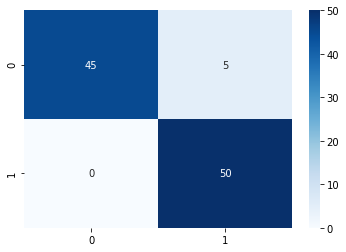

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict_classes(X_test))
sns.heatmap(cm, cmap='Blues', annot=True)

In [0]:
model.evaluate(X_test, y_test, verbose=1)

4/4 [==============================] - 12s 3s/step - loss: 0.1956 - accuracy: 0.9500


[0.19559089839458466, 0.949999988079071]

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model.predict(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, -1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


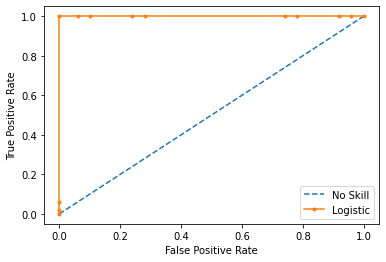

In [0]:
from matplotlib import pyplot

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()